<a href="https://colab.research.google.com/github/shidavies23-cell/david/blob/main/Copy_of_advanced_data_analytics_for_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

file_path = "/Supermarket-Sales-Data-for-Analysis.xlsx"
df = pd.read_excel(file_path)

df.head()


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,NaN,Excel Data for Analysis,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Supermarket Sales Data,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tax,0.1


In [ ]:
import kagglehub
path = kagglehub.dataset_download("harisonmwangi/kenya-elections-2022-results")

In [ ]:
df_clean = df.dropna(how="all").dropna(axis=1, how="all").reset_index(drop=True)

df_clean.head()


,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,Excel Data for Analysis,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Supermarket Sales Data,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,Tax,0.1
3,Order No,Order Date,Customer Name,Ship Date,Retail Price (USD),Order Quantity,Tax (USD),Total (USD)
4,1001,2024-01-01 00:00:00,John Smith,2024-01-03 00:00:00,49.99,2,9.998,109.978


In [ ]:
df_final = df_clean.iloc[3:].copy()

df_final.columns = [
    "Order_No", "Order_Date", "Customer_Name", "Ship_Date",
    "Retail_Price_USD", "Order_Quantity", "Tax_USD", "Total_USD"
]

numeric_cols = ["Retail_Price_USD", "Order_Quantity", "Tax_USD", "Total_USD"]
df_final[numeric_cols] = df_final[numeric_cols].apply(pd.to_numeric, errors="coerce")

df_final["Order_Date"] = pd.to_datetime(df_final["Order_Date"], errors="coerce")
df_final["Ship_Date"] = pd.to_datetime(df_final["Ship_Date"], errors="coerce")

df_final = df_final[df_final["Order_No"] != "Order No"]

df_final.head()


/tmp/ipython-input-3916606687.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_final["Order_Date"] = pd.to_datetime(df_final["Order_Date"], errors="coerce")
/tmp/ipython-input-3916606687.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_final["Ship_Date"] = pd.to_datetime(df_final["Ship_Date"], errors="coerce")


,Order_No,Order_Date,Customer_Name,Ship_Date,Retail_Price_USD,Order_Quantity,Tax_USD,Total_USD
4,1001,2024-01-01,John Smith,2024-01-03,49.99,2.0,9.998,109.978
5,1002,2024-01-01,Jane Doe,2024-01-04,29.99,1.0,2.999,32.989
6,1003,2024-01-02,Michael Johnson,2024-01-07,99.99,3.0,29.997,329.967
7,1004,2024-01-02,Emily Brown,2024-01-03,19.99,4.0,7.996,87.956
8,1005,2024-01-03,David Wilson,2024-01-08,149.99,1.0,14.999,164.989


In [ ]:
df_final.describe()


,Order_Date,Ship_Date,Retail_Price_USD,Order_Quantity,Tax_USD,Total_USD
count,70,70,70.000000,70.000000,70.000000,70.000000
mean,2024-01-18 00:00:00,2024-01-20 21:36:00,84.418571,2.400000,14.097600,155.073600
min,2024-01-01 00:00:00,2024-01-03 00:00:00,19.990000,1.000000,2.999000,32.989000
25%,2024-01-09 06:00:00,2024-01-13 06:00:00,39.990000,1.000000,12.247500,134.722500
50%,2024-01-18 00:00:00,2024-01-19 12:00:00,69.990000,2.000000,14.995000,164.945000
75%,2024-01-26 18:00:00,2024-01-29 00:00:00,129.990000,3.000000,14.999000,164.989000
max,2024-02-04 00:00:00,2024-02-08 00:00:00,199.990000,5.000000,29.997000,329.967000
std,NaN,NaN,57.043988,1.334058,3.894425,42.838676


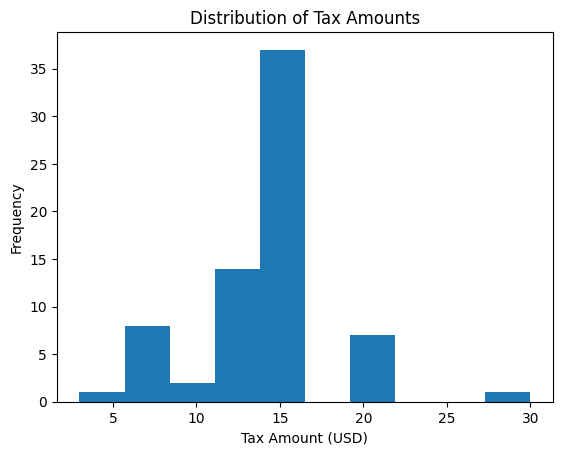

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
df_final["Tax_USD"].plot(kind="hist")
plt.xlabel("Tax Amount (USD)")
plt.ylabel("Frequency")
plt.title("Distribution of Tax Amounts")
plt.show()


In [ ]:
daily_sales = df_final.groupby("Order_Date").agg(
    Total_Sales_USD=("Total_USD", "sum"),
    Total_Orders=("Order_No", "count"),
    Total_Quantity=("Order_Quantity", "sum")
)

daily_sales.head()


,Total_Sales_USD,Total_Orders,Total_Quantity
Order_Date,,,
2024-01-01,142.967,2,3.0
2024-01-02,417.923,2,7.0
2024-01-03,340.967,2,3.0
2024-01-04,285.945,2,5.0
2024-01-05,318.978,2,2.0


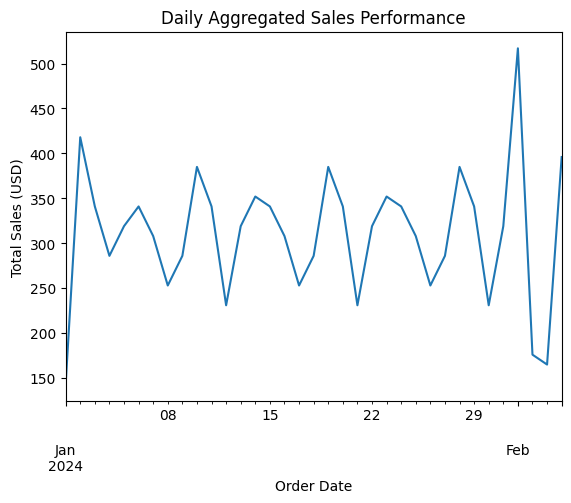

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
daily_sales["Total_Sales_USD"].plot()
plt.xlabel("Order Date")
plt.ylabel("Total Sales (USD)")
plt.title("Daily Aggregated Sales Performance")
plt.show()


In [ ]:
customer_agg = df_final.groupby("Customer_Name").agg(
    Total_Spent_USD=("Total_USD", "sum"),
    Total_Orders=("Order_No", "count"),
    Avg_Order_Value=("Total_USD", "mean")
).sort_values(by="Total_Spent_USD", ascending=False)

customer_agg.head()


,Total_Spent_USD,Total_Orders,Avg_Order_Value
Customer_Name,,,
Jennifer Davis,538.912,3,179.637333
Michael Johnson,505.945,2,252.972500
David Wilson,472.967,3,157.655667
Jessica Wilson,395.967,2,197.983500
David Rodriguez,329.912,2,164.956000


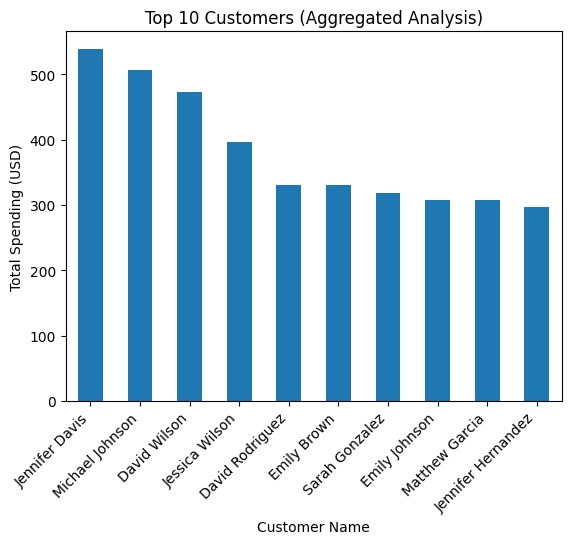

In [ ]:
plt.figure()
customer_agg["Total_Spent_USD"].head(10).plot(kind="bar")
plt.xlabel("Customer Name")
plt.ylabel("Total Spending (USD)")
plt.title("Top 10 Customers (Aggregated Analysis)")
plt.xticks(rotation=45, ha="right")
plt.show()


In [ ]:
price_agg = df_final.groupby("Retail_Price_USD").agg(
    Total_Quantity_Sold=("Order_Quantity", "sum"),
    Total_Revenue=("Total_USD", "sum")
).reset_index()

price_agg.head()


,Retail_Price_USD,Total_Quantity_Sold,Total_Revenue
0,19.99,32.0,703.648
1,29.99,36.0,1187.604
2,39.99,21.0,923.769
3,49.99,23.0,1264.747
4,69.99,14.0,1077.846


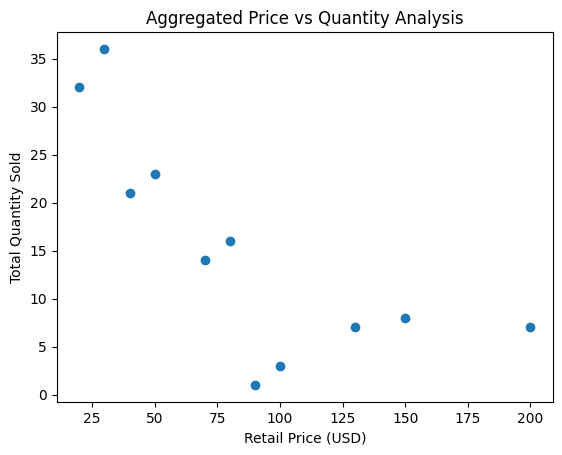

In [ ]:
plt.figure()
plt.scatter(price_agg["Retail_Price_USD"], price_agg["Total_Quantity_Sold"])
plt.xlabel("Retail Price (USD)")
plt.ylabel("Total Quantity Sold")
plt.title("Aggregated Price vs Quantity Analysis")
plt.show()
